## Chapter 5
# Detection Using Cross Correlation With Whistler Kernel

In [1]:
import os, sys
import numpy as np
from math import floor
from matplotlib import pyplot as plt
from tqdm import tqdm
import h5py
from scipy import signal
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))
from sample import Sample
from dataset import Dataset
from database import Database
from cfar_detector import CFARDetector

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
database = Database(dataset_loc, database_loc, site)

linewidth = 2
font_title = 32
font_legend = 20
font_label = 24
font_ticks = 18
font = [font_title, font_legend, font_label, font_ticks, linewidth] # [None]*5

2013-04-22UT01:28:03.48279656.marion.vr2


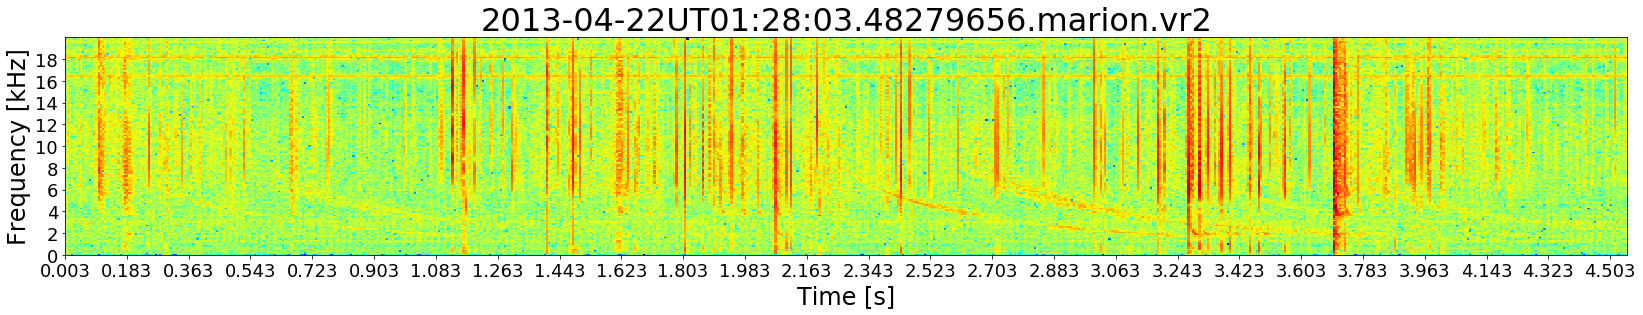

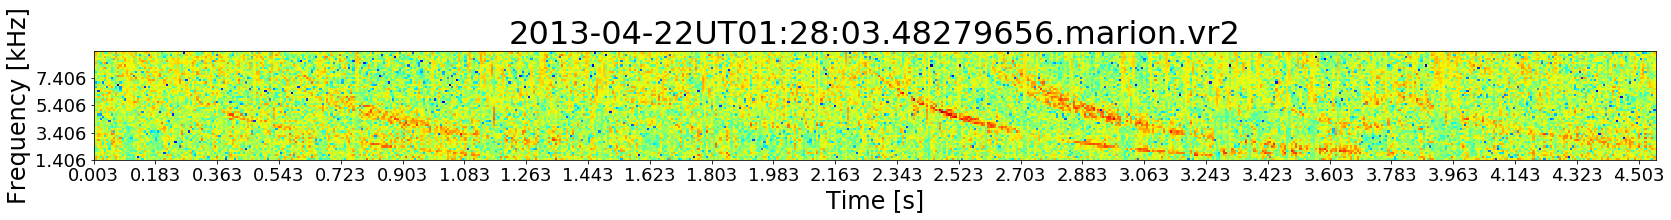

In [2]:
file = np.random.choice(database.get_train(),1)[0]
file = '2013-04-22UT01:28:03.48279656.marion.vr2'
print(file)
sample = CFARDetector(dataset_loc, site, file)
freq_size = 4
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
transforms = ['slice', 'zscore']
transforms_params = [[1.5,9.5], ['None']]
sample.spectrogram_with_axis(log10=True)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2], title=sample.get_file(), cmap='jet', cmap_show=False, font=font)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size/2)
figsize = sample.get_figsize()
sample.apply_transform(transforms, transforms_params)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2],
                           title=sample.get_file(), cmap='jet', cmap_show=False, font=font)

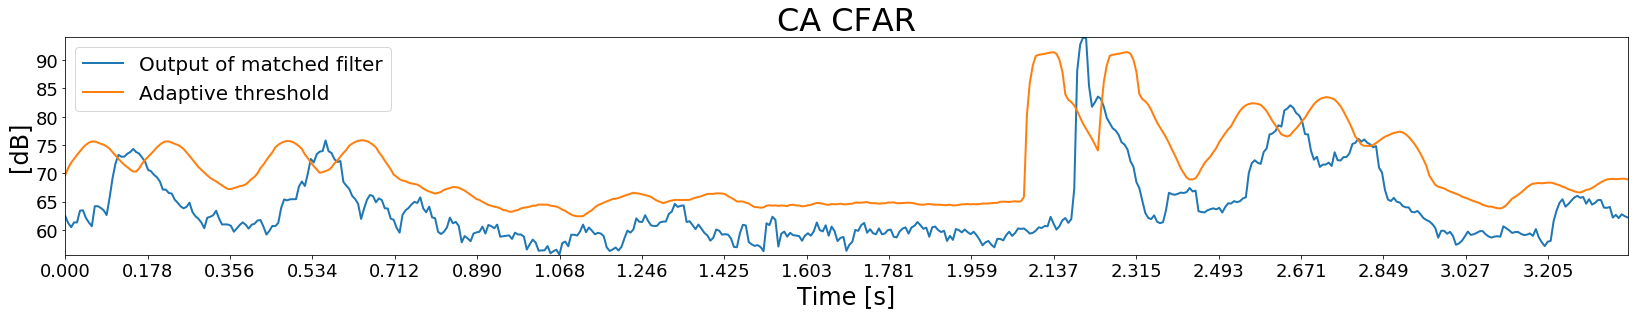

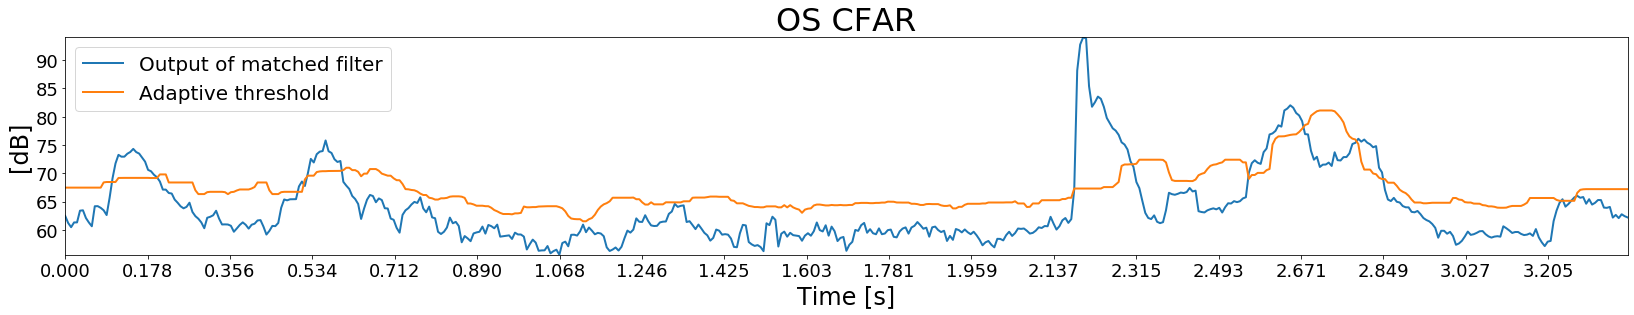

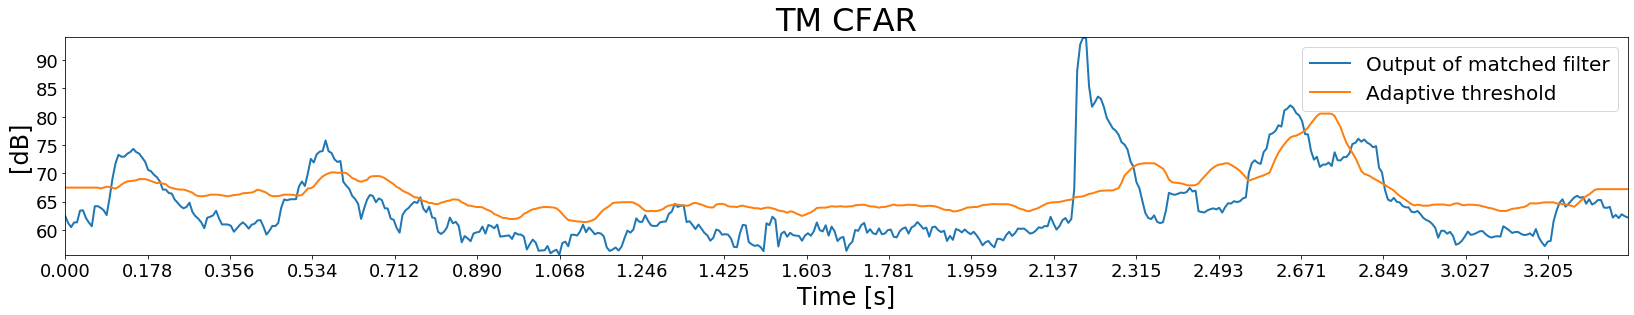

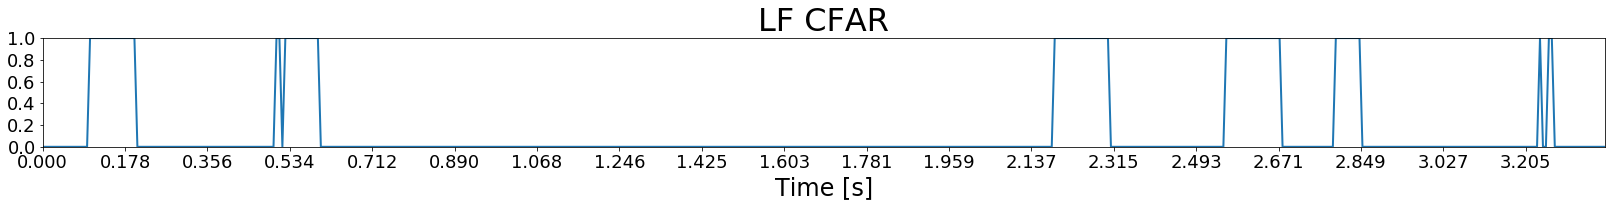

[['0.153' '73.745']
 ['0.512' '68.540']
 ['0.563' '75.803']
 ['2.245' '81.757']
 ['2.616' '77.488']
 ['2.820' '75.118']
 ['3.236' '65.406']
 ['3.262' '65.735']]


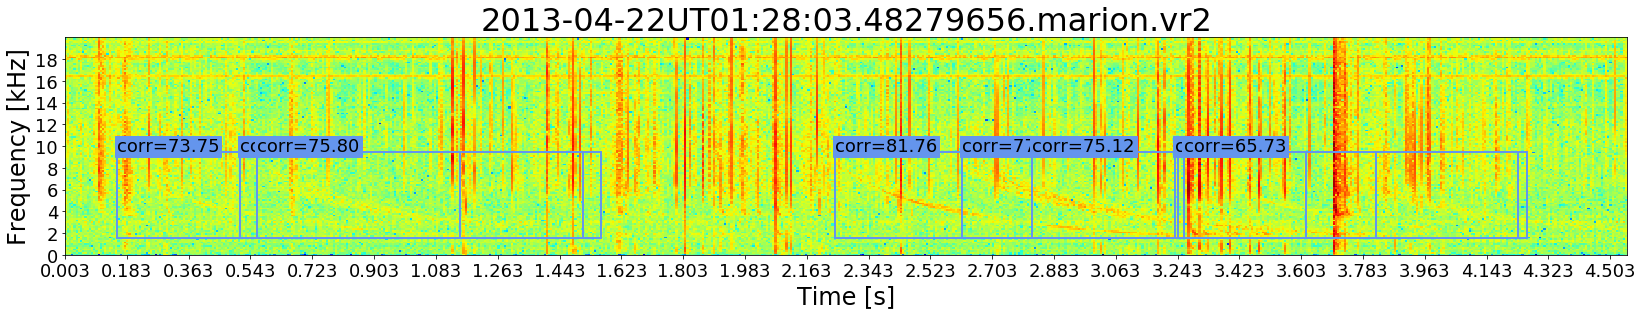

In [3]:
N, G = 10 , 7
X_dB = 5
pfa = (1/(1+(10**(X_dB/10))/(2*N)))**(2*N)
k = N-1
TS,TL = floor(N/3), N

kernel = sample.load_kernel('sim', [0.35,80,1])
sample.plot_corr_output(transforms, transforms_params, 'ca_cfar', [N,G,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='CA CFAR',font=font)
sample.plot_corr_output(transforms, transforms_params, 'os_cfar', [N,G,k,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='OS CFAR',font=font)
sample.plot_corr_output(transforms, transforms_params, 'tm_cfar', [N,G,TS,TL,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='TM CFAR',font=font)
sample.plot_detection_pulse(transforms, transforms_params, 'fusion_cfar', [N,G,k,TS,TL,pfa], kernel=kernel, figsize=(figsize[0],2), title='LF CFAR',font=font)
output = sample.detection_starting_locations(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa])
print(output)
bbox = sample.detection_bounding_boxes(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa])

sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
transforms = ['slice', 'zscore']
transforms_params = [[1.5,9.5], ['None']]
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2], title=sample.get_file(), cmap='jet', cmap_show=False, 
                        font=font,output=bbox)

2013-02-22UT08:06:39.28227602.marion.vr2


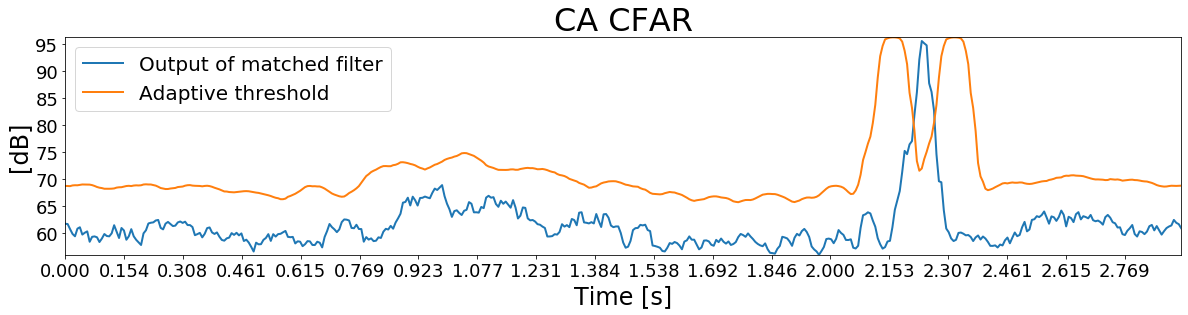

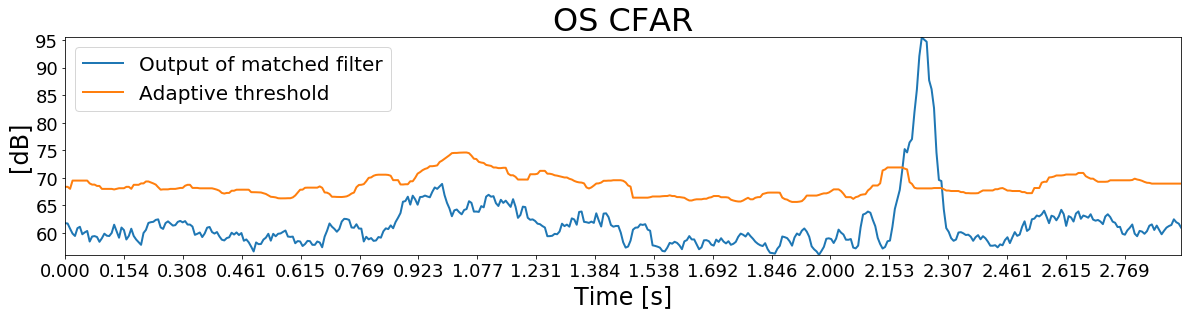

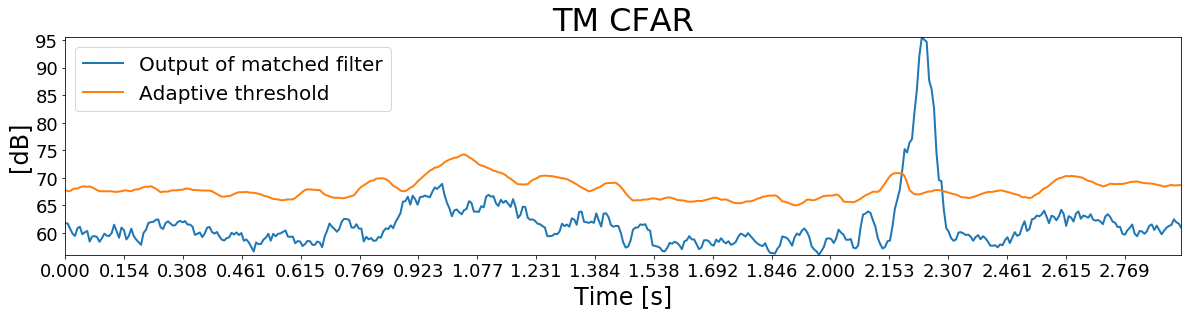

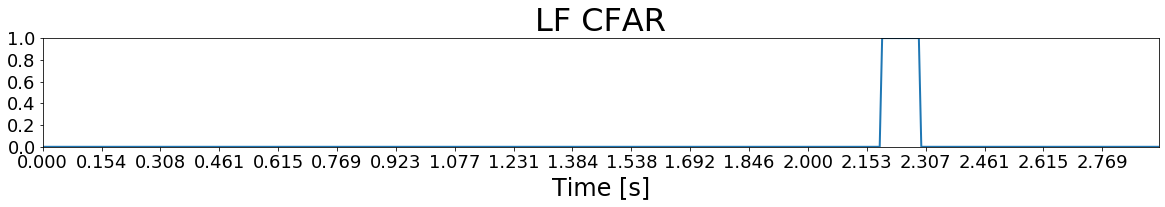

[['2.245' '95.064']]
[[ 2.245  3.245  1.5    9.5   95.064]]


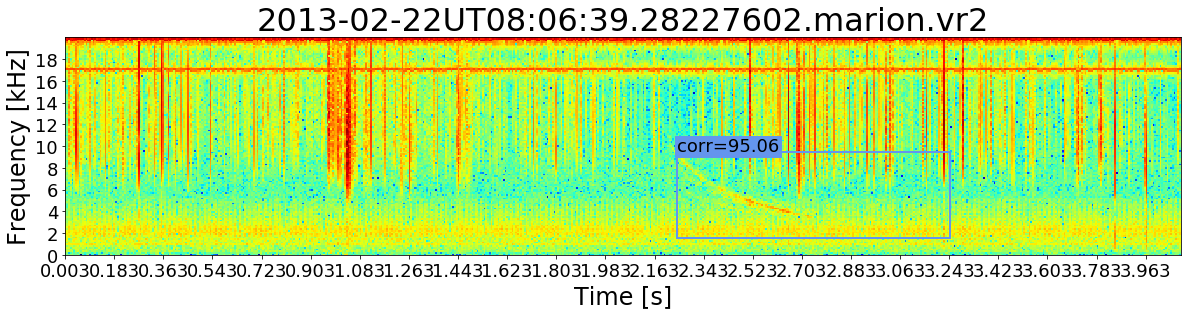

In [15]:
file = np.random.choice(database.get_train(),1)[0]
# file = '2013-07-26UT01:21:37.31171914.marion.vr2' # perfect perfect
# file = '2013-01-27UT01:02:20.38947602.marion.vr2' # perfect cfar example
# file = '2013-07-29UT02:52:11.93571922.marion.vr2'

# file = '2013-07-23UT17:43:48.20451906.marion.vr2'
# file = '2013-07-05UT19:09:09.53571914.marion.vr2'
# file = '2013-07-04UT18:57:16.16611930.marion.vr2'

# thick
# file = '2013-07-29UT13:35:32.63971914.marion.vr2'
# file = '2013-07-30UT22:42:37.67651922.marion.vr2'
# file = '2013-07-29UT14:10:55.64771914.marion.vr2'
# file = '2013-07-02UT16:02:40.59491914.marion.vr2'
# file ='2013-07-10UT19:35:10.41891938.marion.vr2'
print(file)
sample = CFARDetector(dataset_loc, site, file)
freq_size = 4
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
figsize=sample.get_figsize()
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size/2)
sample.apply_transform(transforms, transforms_params)
N, G = 10 , 7
X_dB = 8
pfa = (1/(1+(10**(X_dB/10))/(2*N)))**(2*N)
k = N-1
TS,TL = floor(N/3), N

kernel = sample.load_kernel('sim', [0.35,80,1])
sample.plot_corr_output(transforms, transforms_params, 'ca_cfar', [N,G,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='CA CFAR',font=font)
sample.plot_corr_output(transforms, transforms_params, 'os_cfar', [N,G,k,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='OS CFAR',font=font)
sample.plot_corr_output(transforms, transforms_params, 'tm_cfar', [N,G,TS,TL,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='TM CFAR',font=font)
sample.plot_detection_pulse(transforms, transforms_params, 'fusion_cfar', [N,G,k,TS,TL,pfa], kernel=kernel, figsize=(figsize[0],2), title='LF CFAR',font=font)
output = sample.detection_starting_locations(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa])
print(output)
bbox = sample.detection_bounding_boxes(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa], threshold=74)
print(bbox)
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
transforms = ['slice', 'zscore']
transforms_params = [[1.5,9.5], ['None']]
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2], title=sample.get_file(), cmap='jet', cmap_show=False, 
                        font=font,output=bbox)